# Mise à disposition du jeu de données stroke_dataset via une API REST

## Description du dataset

Le jeu de données utilisé provient de Kaggle : [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset).  
Il contient des données de patients avec différentes caractéristiques médicales et sociales, ainsi que l'information si le patient a subi un accident vasculaire cérébral (AVC) ou non.

Télécharger les données et ajouter les dans un dossier data/.

Les colonnes des données sont :  
- `id` : Identifiant unique du patient  
- `gender` : Sexe  
- `age` : Âge  
- `hypertension` : Présence d'hypertension (0 ou 1)  
- `heart_disease` : Présence de maladie cardiaque (0 ou 1)  
- `ever_married` : Statut marital  
- `work_type` : Type d'emploi  
- `Residence_type` : Urbaine ou rurale  
- `avg_glucose_level` : Moyenne du taux de glucose  
- `bmi` : Indice de masse corporelle  
- `smoking_status` : Statut tabagique  
- `stroke` : Présence d'AVC (0 ou 1)

## Projet

Vous devez exposer les données patients du jeu de données via une API REST afin que les données soit utilisables par d'autres équipes (médecins, data science, étude, etc.).

Cette API REST sera développée avec FastAPI et les spécifications sont les suivantes :
| Méthode | Endpoint                                      | Fonctionnalité                                                                                                    |
| ------- | --------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- |
| `GET`   | `/patients/{id}`                              | Récupère les détails d’un patient donné (via son identifiant unique)                                              |
| `GET`   | `/patients?stroke=1&gender=Female&max_age=60` | Renvoie les patients filtrés selon plusieurs critères : AVC (oui/non), genre, âge maximal                         |
| `GET`   | `/stats/`                                     | Fournit des statistiques agrégées sur les patients (ex. : nb total de patients, âge moyen, taux d’AVC, répartition hommes/femmes, etc.) |



---

## Quelques définitions


1. Qu’est-ce qu’une API REST ?

- API signifie Application Programming Interface (Interface de Programmation d’Application). C’est un ensemble de règles et de protocoles qui permettent à des logiciels de communiquer entre eux.
- REST signifie Representational State Transfer. C’est un style architectural pour concevoir des services web.
Il en existe d'autres mais REST est celui que vous rencontrerez le plus souvent.
- Vous avez utilisé une API REST via l'API Google Books.

- A quoi sert une API REST ?

    - Permet à différentes applications de communiquer facilement, même si elles sont écrites dans des langages différents.
    - Permet d’accéder à des services distants (ex : bases de données, services web) de manière standardisée.
    - Facilite la création d’applications modulaires et évolutives (front-end, back-end, mobile, etc.)

2. Principes clés d’une API REST

- a. Utilisation du protocole HTTP
Les échanges entre client et serveur utilisent des méthodes HTTP standard comme :

    - GET : pour récupérer des données
    - POST : pour envoyer ou créer des données
    - PUT : pour mettre à jour des données
    - DELETE : pour supprimer des données

- b. Accès aux ressources via des URLs

Chaque ressource (par exemple un livre, un utilisateur) est accessible via une URL unique.

Exemple fictif:
    https://api.example.com/books/123 pour accéder au livre d’identifiant 123.

- c. Stateless (sans état)

Le serveur ne conserve aucune information sur le client entre deux requêtes. Chaque requête doit contenir toutes les informations nécessaires.

- d. Représentations des données

Les données sont envoyées et reçues généralement en format JSON ou XML, qui sont faciles à lire et à manipuler.

- e. Utilisation de codes status HTTP

Chaque réponse du serveur est accompagnée d’un code HTTP indiquant le résultat de la requête. (cf [liste des codes](https://developer.mozilla.org/en-US/docs/Web/HTTP/Reference/Status))

## Outils utilisés
1. FastAPI

FastAPI est un framework Python moderne, rapide et très utilisé dans le milieu professionnel pour construire des API REST. 

Il permet :
- une définition simple des routes et des paramètres  
- La génération automatique de documentation interactive (Swagger UI)  
- FastAPI lit les requêtes entrantes, les traite avec ton code Python, et retourne une réponse HTTP (en JSON).

2. Uvicorn : exécute l'application FastAPI

- Uvicorn est un serveur ASGI (Asynchronous Server Gateway Interface) : c'est une interface standard pour gérer les requêtes de manière asynchrone et performante, notamment utile pour les applications modernes.
- Il attend les requêtes HTTP (par exemple depuis un navigateur), les transmet à FastAPI, et renvoie la réponse.
- Uvicorn permet à l'API de fonctionner : sans Uvicorn ou un autre serveur, FastAPI ne peut pas fonctionner.


3. Swagger UI : l’interface de doc et test interactive

- Swagger UI est généré automatiquement par FastAPI.
- C’est une interface web qui permet de :
    - Voir toutes les routes disponibles dans l'API
    - Tester les routes en envoyant des requêtes sans écrire de code (bouton try it out)
    - Voir les paramètres attendus et les formats de réponse
    
4. Résumé des interactions

- Tester la route de base de l'API grâce à la commande :
```bash
    poetry run fastapi dev stroke_api/main.py
```

--> Qu'est-ce qu'il se passe derrière cette commande ?

- Uvicorn démarre un serveur local
- FastAPI génère automatiquement une interface : Swagger UI, accessible sur http://127.0.0.1:8000/docs qui affiche toutes les routes définies dans le code python FastAPI
- Quand on clique sur "Try it out" dans Swagger UI, Swagger envoie une requête HTTP au serveur (ici Uvicorn)
- Le serveur (Uvicorn) la reçoit, l’envoie à FastAPI, qui traite et renvoie une réponse
- Swagger UI affiche la réponse de l’API (par ex : liste de patients)

---

Import des bibliothèques utiles au projet

In [1]:
import pandas as pd

## 1. Prétraitement des données / Data preprocessing

Les données réelles sont rarement prêtes à être utilisées directement. Elles peuvent contenir des erreurs, des valeurs manquantes, des doublons, des formats incohérents, ou ne pas être adaptées au modèle ou au système cible.

Le prétraitement consiste à nettoyer, structurer et transformer les données brutes avant de les exploiter dans un projet (modèle IA, API, visualisation, etc.).

Vous avez déjà prétraité des données, petit rappel des éléments sur lesquels travailler dans un prétraitment classique et les méthodes pandas qu'il est possible d'utiliser pour les différentes étapes (des exeples d'utilisation des méthodes pandas sont disponibles dans la doc) : 
- explorer les données pour identifier les types de données, valeurs manquantes, incohérence ([info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html), [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html))
- adapter les types si nécessaire ([astypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html))
- identifier les doublons et les supprimer s'il y en a ([duplicated](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html), [drop_duplicates](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html))
- traiter les valeurs manquantes s'il y en a ([fillna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html), [dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html))
- identifier les incohérences éventuelles (valeurs aberrantes/outliers) en vérifiant si les valeurs min, max, moyennes sont raisonnables (recherche internet si nécessaire) ([describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)), et les traiter.
- Traiter les valeurs aberrantes si vous en détectez ([loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) pour récupérer les lignes qui répondent à une certaine condition, cf exemple ci-dessous)


**Exemple df.loc :**

Récupérer toutes les lignes de df telles que la valeur de "nom de colonne" >= 0

```df_subset = df.loc[stroke_data_df['nom de colonne'] >= 0]```



---
### **TODO**
1.a. Prétraiter les données du dataset.


1.b. Documenter dans le README.md :
- Les étapes de prétraitement,
- Justification des choix concernant le traitement des valeurs manquantes (si besoin),
- Liste des valeurs raisonnables utilisées pour détecter les valeurs aberrantes, 
- Justification des choix pour traiter les valeurs aberrantes (si besoin).

2.a. Chercher des infos sur le format de fichier parquet et indiquer les sources consultées : 
- Différence principale avec le format csv ?
- Dans quels cas l'utiliser ? 
- Pourquoi c'est un format adapté aux gros volumes de données ?



2.b. Sauvegarder les données prétraiteées dans un fichier parquet ([to_parquet](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_parquet.html)).


In [ ]:
#1.a Prétraitement de données



In [42]:
import os
print(os.getcwd())  # Affiche le dossier courant


/


In [67]:
#Chargement du dataset
import pandas as pd
df = pd.read_csv("/home/chaima/stroke-api/stroke_api/data/healthcare-dataset-stroke-data.csv") 

In [ ]:
# Aperçu des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [69]:
#Aperçu des données
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [70]:
#Aperçu des données
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### verification si on a besoin traitement des doublons:

In [ ]:
#verification si on a besoin traitement des doublons:
#Compter le nombre de lignes dupliquées
df.duplicated().sum()  
#resultat-->DataFrame ne contient aucun doublon

np.int64(0)

 Traitement des valeurs manquantes

In [73]:
#Traitement des valeurs manquantes
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Colonne bmi contient des NaN 
# On les remplit par la moyenne selon le groupe exact (gender + age)

# remplir les NaN avec la moyenne du groupe (gender, age)
df['bmi'] = df['bmi'].fillna(
    df.groupby(['gender', 'age'])['bmi'].transform('mean')
)

In [ ]:
# verification 
df['bmi'].isna().sum()

np.int64(1)

In [ ]:
# afficher les lignes où bmi est encore manquant
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2030,38920,Male,0.48,0,0,No,children,Urban,73.02,NaN,Unknown,0


l’âge pour cette valuer  est 0.48 ( c a d moins d’un an, probablement bébé), alors que le groupe (gender='Male', age=0.48) n’a peut-être aucune autre ligne avec un bmi renseigné pour calculer la moyenne et remplir ce NaN.
alors on va le Remplir par une valeur médicale "standard" pour un bébé.

solution :  remplacement de  ce NaN par une valeur fixe estimée (exemple : 16 comme IMC bébé moyen)

In [ ]:

# Remplacer les NaN pour les bébés (age < 1 an) par une valeur fixe 
mask_babies = (df['age'] < 1) & (df['bmi'].isna())
df.loc[mask_babies, 'bmi'] = 16

# Pour tout autre NaN restant, remplir par la moyenne globale
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# Vérification finale
print("Nombre de NaN restants dans 'bmi' :", df['bmi'].isna().sum())

Nombre de NaN restants dans 'bmi' : 0


### Verification si on a besoin de nettoyage des types

In [ ]:
# Verification si on a besoin Nettoyage des types 
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### resultat : pas besoin de modifier les types obligatoirement mais on peut le categoriser 

In [ ]:
# resultat : pas besoin de modifier les types obligatoirement mais on peut le categoriser 
#Conversion types en category
#Convertir les colonnes catégorielles pour gagner en mémoire et faciliter les modèles 
cat_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df[cat_cols] = df[cat_cols].astype('category')

In [48]:
#Valeurs à inspecter manuellement
#Examine les valeurs uniques pour repérer d’éventuelles erreurs :
for col in cat_cols:
    print(f"{col} : {df[col].unique()}")

gender : ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other']
ever_married : ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
work_type : ['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked']
Categories (5, object): ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
Residence_type : ['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
smoking_status : ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


In [82]:
# Analyse de la variable cible stroke: Pour voir la proportion de patients avec AVC vs sans AVC 

df['stroke'].value_counts(normalize=True)
#--> Problème : Forte déséquilibre de classes :Seulement ~5% des patients ont eu un AVC-->risque de prédire toujours 0 (pas d’AVC)

stroke
0    0.951148
1    0.048852
Name: proportion, dtype: float64

### Détection de valeurs aberrantes

Méthode utilisée : IQR (InterQuartile Range)

Formule : borne basse = Q1 - 1.5×IQR ; borne haute = Q3 + 1.5×IQR

Variables analysées : bmi, age, avg_glucose_level

Traitement : Les valeurs hors bornes ont été considérées comme aberrantes et supprimées du jeu de données nettoyé.

In [92]:
# Détection des valeurs aberrantes
outliers_age = df[df['age'] < 1]
outliers_glucose = df[df['avg_glucose_level'] > 169.36]
outliers_bmi = df[df['bmi'] > 46.3]

print("Valeurs aberrantes pour l'âge :", outliers_age.shape[0])
print("Valeurs aberrantes pour le glucose :", outliers_glucose.shape[0])
print("Valeurs aberrantes pour le BMI :", outliers_bmi.shape[0])

Valeurs aberrantes pour l'âge : 43
Valeurs aberrantes pour le glucose : 625
Valeurs aberrantes pour le BMI : 111


In [91]:
# identifier des individus avec des valeurs de bmi, age,avg_glucose_level considérées comme hors norme.
for col in ['bmi', 'age', 'avg_glucose_level']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Définir les limites
    borne_basse = Q1 - 1.5 * IQR
    borne_haute = Q3 + 1.5 * IQR
    # Afficher les outliers
    outliers = df[(df[col] < borne_basse) | (df[col] > borne_haute)]
    print(f"{col} → {len(outliers)} outliers détectés (hors [{borne_basse:.2f}, {borne_haute:.2f}])")
    if not outliers.empty:
        print(f"\nStatistiques des outliers pour {col}:")
        print(outliers.describe())


bmi → 110 outliers détectés (hors [10.05, 46.45])

Statistiques des outliers pour bmi:
                 id         age  hypertension  heart_disease  \
count    110.000000  110.000000    110.000000     110.000000   
mean   31518.972727   44.827273      0.145455       0.009091   
std    20467.319898   13.590916      0.354172       0.095346   
min       99.000000   14.000000      0.000000       0.000000   
25%    14091.000000   35.500000      0.000000       0.000000   
50%    31252.500000   45.000000      0.000000       0.000000   
75%    47749.000000   53.000000      0.000000       0.000000   
max    72696.000000   82.000000      1.000000       1.000000   

       avg_glucose_level         bmi      stroke  
count         110.000000  110.000000  110.000000  
mean          126.005364   51.529091    0.027273  
std            59.840501    3.370660    0.163622  
min            56.630000   46.500000    0.000000  
25%            80.822500   48.725000    0.000000  
50%            99.440000   50.

Les valeurs extrêmes détectées par la méthode IQR ont été conservées car elles reflètent des cas médicaux plausibles et importants 

on choisie d'appliquer une  transformation logarithmique pour que  les outliers ont moins d’impact négatif sur les modèles.

In [ ]:
# Transformation log1p pour bmi et avg_glucose_level
import numpy as np

# Colonnes concernées par la transformation log
cols_to_transform = ['bmi', 'avg_glucose_level']

for col in cols_to_transform:
    df[col + '_log'] = np.log1p(df[col])  # log1p = log(1 + x)
    print(df)

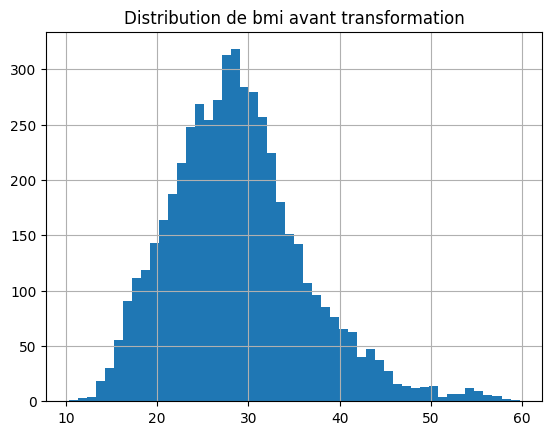

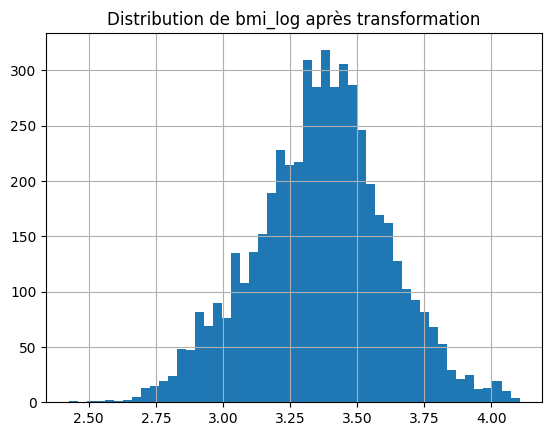

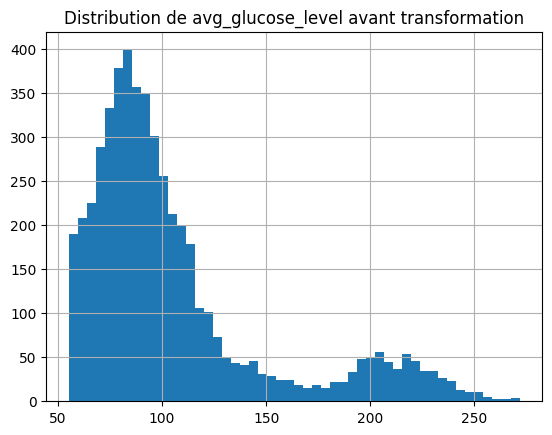

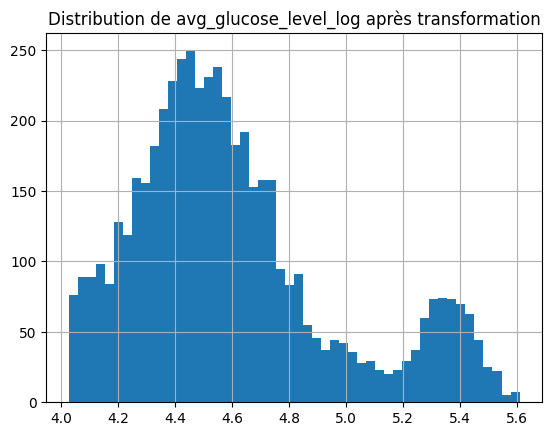

In [ ]:
#Vérification de l’effet des transformations : visualiser si la transformation a été efficace.
import matplotlib.pyplot as plt

for col in cols_to_transform:
    plt.figure()
    df[col].hist(bins=50)
    plt.title(f'Distribution de {col} avant transformation')
    
    plt.figure()
    df[col + '_log'].hist(bins=50)
    plt.title(f'Distribution de {col}_log après transformation')


-----
## Développement de l'API

A présent que les données sont propres, on peut débuter la création de l'API.

Pour cela, vous allez avoir besoin de quelques fonctions permettant de filtrer les données.

Vous allez les définir ci-dessous, ce qui vous permettra de les tester puis les fonctions seront reportées dans le fichier filters.py.

## Route `/patients/`
- Cette route retourne une liste filtrée de patients
- On souhaite pouvoir filtrer par `gender`, `stroke` ou `max_age`

L'objectif est ici de définir une fonction python qui prend en entrée les paramètres optionnels : _gender_, *stroke*, *max_age* et qui renvoie un dictionnaire filtré des données.

On décompose la rédaction de cette fonction en plusieurs étapes. 

Dans un premier temps, écrire et tester les filtres que l'on souhaite appliquer sur les données (utiliser [loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html))

In [ ]:
# Filtrer le dataframe pour ne garder que les patients pour lesquels "stroke=1"


In [ ]:
# Filtrer les données pour ne garder que les patients pour lesquels "gender="male"


In [ ]:
# Filtrer les données pour ne garder que les patients tels que "age <= max_age"


Appliquer successivement les 3 filtres au sein d'une fonction qui prend en entrée le dataframe, _stroke_, _gender_, _max_age_ et qui renvoie une liste de dictionnaire de patients (utiliser la méthode pandas [to_dict](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html)).

Exemple
```
[{'id': 9046,
  'gender': 'Male',
  'age': 67.0,
  ...
  'smoking_status': 'formerly smoked',
  'stroke': 1},
 {'id': 31112,
  'gender': 'Male',
  'age': 80.0,
  ...
  'smoking_status': 'formerly smoked',
  'stroke': 1}]
  ```

In [ ]:
def filter_patient(df, max_age, gender, stroke):

A présent on souhaite ajouter des informations sur les types des paramètres et valeurs de retour de la fonction pour faciliter sa compréhension et son utilisation, ce qu’on appelle l’annotation de type (type hinting).

Cette pratique facilite la lecture et la maintenance du code.

Quels changements pour la fonction ?

A la suite de chaque paramètre, on ajoute le type attendu pour le paramètre. À la suite des paramètres on ajoute le type de ce que qui est retourné par la fonction, dans l'exemple ici : 

```def filter_patient(stroke_data_df: pd.DataFrame, gender: str, etc) -> list[dict]```

Ajouter les types dans la définition de la fonction.

Tester la fonction en ne mettant pas de valeur pour *max_age*.

Que se passe-t-il ?

Dans la fonction écrite ci-dessus, chaque paramètre est obligatoire. 

On souhaite pouvoir filtrer les patients sur 0, 1 ou 2 des paramètres de la fonction (filtrer seulement sur *max_age*  mais ne pas appliquer de filtres sur _gender_ et _stroke_ par exemple).

On peut rendre optionnel les paramètres d'un fonction en choisissant une valeur par défault. Si on utilise la fonction en n'utilisant pas ces paramètres alors la valeur par défault est utilisé.

Copier coller votre fonction ci-dessous et ajouter en paramètre : `max_age=None`

et ajouter la condition suivante **avant le filtre** sur `max_age` : 

```if max_age is not None : ``` 

Si la fonction _filter_patient_ est appelée sans argument *max_age*, alors le filtre sur *max_age* n'est pas appliqué. 

Il est tout à fait possible de définir une valeur par défault par exemple 30 ans : dans ce cas si la fonction est appelée sans argument *max_age*, alors par défault on filtre les patients ayant moins de 30 ans.

**ATTENTION :** Les paramètres optionnels doivent toujours être à la fin de la liste de paramètres.

In [ ]:
# fonction filter_patient paramètre max_age optionnel


In [ ]:
# test fonction sans argument max_age


Ajouter des valeurs par défault et les conditions pour chaque filtre.

Pour les types, on indique qu'il s'agit de paramètres optionels en utilisant le module python _typing_

```
from typing import Optional
def filter_patient(stroke_data_df: pd.DataFrame, gender: Optional[str] = None,etc)
```

Adapter les types en utilisant ce modèle.

In [ ]:
# fonction avec ajout de paramètres par défault et de type

Tester la fonction sans argument pour les filtres, elle doit donc renvoyer le dataframe non filtré.

In [ ]:
# test fonction sans argument pour les filtres

Cette fonction va être utilisée dans la définition de l'API pour créer une route qui permette d'accéder à des données filtrées sur les patients.

Dans le fichier de définition de l'API, toutes les fonctions vont travailler sur les données du fichier. 

Pour alléger les fonctions on va donc utiliser une **variable globale** pour les données et supprimer le paramètre `df` de la fonction.

On lit les données en début de fichier puis on travaille au sein des fonctions sur une copie du dataframe de données.


**En résumé les modifications à faire sont :**


- Supprimer le paramètre df de la fonction,
- Ajouter en début de fonction :  
```df = stroke_data_df.copy()```

1. Dans le fichier filters.py, il suffit d'ajouter : 
- lecture du fichier de données prétraitée dans la variable *df* en début de fichier (utiliser pandas),
- @app.get("/patients/") pour définir le route,
puis la fonction.

2. Dans le fichier api.py: appeler la fonction dans la route correspondante.

Tester la route avec 

```poetry run fastapi dev stroke_api/main.py```

http://127.0.0.1:8000/docs : utiliser la fonctionnalité Try it out pour tester la route.

---
## Autres routes

De la même manière, créer les fonctions appropriées pour la création de :
- la route `/patients/{id}` : Récupère les détails d’un patient donné (via son identifiant unique) 

- la route `/stats/` : Fournit des statistiques agrégées sur les patients (ex. : nb total de patients, âge moyen, taux d’AVC, répartition hommes/femmes).

- Lister les tâches à faire sous forme d'issue github : travailler sur une branche différentes pour l'ajout de chacune des routes.